In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
import warnings 
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('spam.csv')
data.dropna(inplace=True)
data['spam_flag'] = data.label.map({'ham': 0, 'spam': 1})
data.drop('label', axis=1, inplace=True)
data.head()

,text,spam_flag
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
data.spam_flag.value_counts()

0    4825
1     747
Name: spam_flag, dtype: int64

In [12]:
data['message_length'] = data.text.apply(len)
data.head()

,text,spam_flag,message_length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


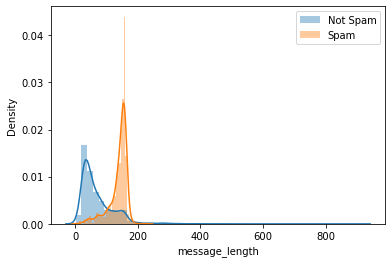

In [17]:
sns.distplot(data[data.spam_flag == 0].message_length, label='Not Spam')
sns.distplot(data[data.spam_flag == 1].message_length, label='Spam')
plt.legend()
plt.show()

In [18]:
import string 
from nltk.corpus import stopwords

In [72]:
def remove_punctuation(text):
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    return text

def remove_stopwords(text):
    STOPWORDS = stopwords.words('english') + ['u', 'ur', 'im', 'dont', 'doin', 'ill', 'n', '2', '4']
    text = [word for word in text.split(' ')]
    text = [word for word in text if word.lower() not in STOPWORDS]
    text = ' '.join(text)
    return text

def text_process(text):
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

In [73]:
data['cleaned_text'] = data.text.apply(text_process)
data.head()

,text,spam_flag,message_length,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis great wo...
1,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [62]:
from collections import Counter

In [74]:
ham_messages = data[data.spam_flag == 0].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words_count = Counter()
for msg in ham_messages:
    ham_words_count.update(msg)
print(ham_words_count.most_common(50))


[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94), ('give', 92), ('say', 91)]


In [76]:
spam_messages = data[data.spam_flag == 1].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words_count = Counter()
for msg in spam_messages:
    spam_words_count.update(msg)
print(spam_words_count.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [78]:
from sklearn.model_selection import train_test_split

In [80]:
x = data.cleaned_text
y = data.spam_flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y)

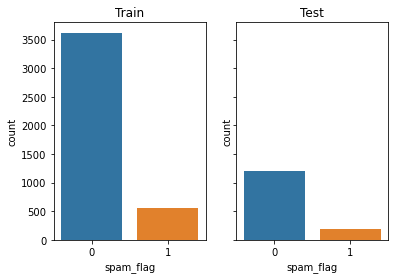

In [99]:
fig, ax = plt.subplots(1, 2, sharey=True)
sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Train')
sns.countplot(y_test, ax=ax[1])
ax[1].set_title('Test')
plt.show()

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [103]:
x_train_dtm = vect.fit_transform(x_train)

In [104]:
x_test_dtm = vect.transform(x_test)

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [106]:
x_train_dtm = tfidf_transformer.fit_transform(x_train_dtm)

In [107]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [109]:
model.fit(x_train_dtm, y_train)
y_pred = model.predict(x_test_dtm)

In [111]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix

In [112]:
accuracy_score(y_test, y_pred)

0.9820531227566404

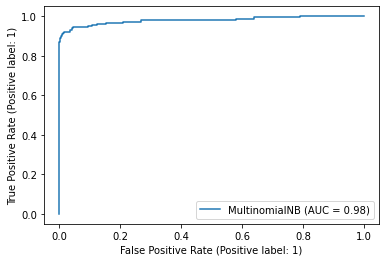

In [114]:
plot_roc_curve(model, x_test_dtm, y_test)
plt.show()

In [115]:
confusion_matrix(y_test, y_pred)

array([[1204,    2],
       [  23,  164]], dtype=int64)

In [121]:
[msg for msg in x_test[y_pred > y_test]]

['Nokia phone lovly', 'Dhoni luck win big titleso win']

In [120]:
[msg for msg in x_test[y_pred < y_test]]

['RCT THNQ Adrian text Rgds Vatian',
 'Missed call alert numbers called left message 07008009200',
 'Sorry missed call lets talk time 07090201529',
 'next amazing xxx PICSFREE1 video sent enjoy one vid enough 2day text back keyword PICSFREE1 get next video',
 'Loans purpose even Bad Credit Tenants Welcome Call NoWorriesLoanscom 08717111821',
 'Ever thought living good life perfect partner txt back NAME AGE join mobile community 100pSMS',
 'Hi lookin saucy daytime fun wiv busty married woman free next week Chat sort time 09099726429 JANINExx Callså£1minMobsmoreLKPOBOX177HP51FL',
 '88066 LOST å£12 HELP',
 'datingi two started sent text talk sport radio last week connection think coincidence',
 'Xmas  New Years Eve tickets sale club day 10am till 8pm Thurs Fri  Sat night week Theyre selling fast',
 'SMS ac Sptv New Jersey Devils Detroit Red Wings play Ice Hockey Correct Incorrect End Reply END SPTV',
 'Download many ringtones like restrictions 1000s choose even send yr buddys Txt Sir 8008